## Data Preprocessing

In [ ]:
import pandas as pd

In [2]:
# Load the CSV file
df = pd.read_csv('channel_data.csv')

# Check the first few rows
print(df.head())

                        Date  Message  Views  Comments Reactions Media Type
0  2024-12-21 14:38:09+00:00  No Text     96         0       NaN      Photo
1  2024-12-21 14:38:09+00:00  No Text     95         0       NaN      Photo
2  2024-12-21 14:38:08+00:00  No Text     95         0       NaN      Photo
3  2024-12-21 14:38:08+00:00  No Text     95         0       NaN      Photo
4  2024-12-21 14:38:08+00:00  No Text     95         0       NaN      Photo


In [3]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date to ensure proper comparison
df = df.sort_values(by='Date')
df.head()

,Date,Message,Views,Comments,Reactions,Media Type
484,2023-12-25 14:25:39+00:00,No Text,0,0,NaN,No Media
483,2023-12-25 15:13:29+00:00,"Велкам! Буду хаотично выкладывать что есть, ли...",300,0,"ReactionEmoji(emoticon='❤'): 9, ReactionEmoji(...",No Media
481,2023-12-25 17:33:51+00:00,No Text,298,0,NaN,Photo
482,2023-12-25 17:33:51+00:00,"Сегодня, кстати, делала самсушки, минимум тест...",298,0,"ReactionEmoji(emoticon='🍓'): 16, ReactionEmoji...",Photo
480,2023-12-25 17:53:53+00:00,"Тесто слоеное, в кз в любом магазе во дворе ес...",301,2,"ReactionEmoji(emoticon='👍'): 7, ReactionEmoji(...",No Media


In [4]:
# Calculate the time difference between consecutive rows
df['Time_Diff'] = df['Date'].diff().dt.total_seconds() / 60  # Difference in minutes

In [5]:
df

,Date,Message,Views,Comments,Reactions,Media Type,Time_Diff
484,2023-12-25 14:25:39+00:00,No Text,0,0,NaN,No Media,NaN
483,2023-12-25 15:13:29+00:00,"Велкам! Буду хаотично выкладывать что есть, ли...",300,0,"ReactionEmoji(emoticon='❤'): 9, ReactionEmoji(...",No Media,47.833333
481,2023-12-25 17:33:51+00:00,No Text,298,0,NaN,Photo,140.366667
482,2023-12-25 17:33:51+00:00,"Сегодня, кстати, делала самсушки, минимум тест...",298,0,"ReactionEmoji(emoticon='🍓'): 16, ReactionEmoji...",Photo,0.000000
480,2023-12-25 17:53:53+00:00,"Тесто слоеное, в кз в любом магазе во дворе ес...",301,2,"ReactionEmoji(emoticon='👍'): 7, ReactionEmoji(...",No Media,20.033333
...,...,...,...,...,...,...,...
4,2024-12-21 14:38:08+00:00,No Text,95,0,NaN,Photo,0.000000
3,2024-12-21 14:38:08+00:00,No Text,95,0,NaN,Photo,0.000000
2,2024-12-21 14:38:08+00:00,No Text,95,0,NaN,Photo,0.000000
1,2024-12-21 14:38:09+00:00,No Text,95,0,NaN,Photo,0.016667


In [6]:
#reset the index
df = df.reset_index(drop=True)

In [7]:
# Aggregation logic
def aggregate_rows(group):
    aggregated_row = group.iloc[0].copy()  # Start with the first row
    aggregated_row['Message'] = " ".join(group['Message'].dropna())  # Concatenate messages
    aggregated_row['Reactions'] = ", ".join(group['Reactions'].dropna().astype(str))  # Combine reactions
    aggregated_row['Media Type'] = ", ".join(group['Media Type'].dropna().astype(str))  # Combine media types
    aggregated_row['Views'] = group['Views'].max()  # Take max for views
    aggregated_row['Comments'] = group['Comments'].max()  # Take max for comments
    return aggregated_row

# Group rows based on time difference
result = []
temp_group = []

for i, row in df.iterrows():
    if not temp_group:
        temp_group.append(row)
    else:
        # Check if time difference is less than 5
        if (row['Date'] - temp_group[-1]['Date']).total_seconds() / 60 < 5:
            temp_group.append(row)
        else:
            # Aggregate the group
            result.append(aggregate_rows(pd.DataFrame(temp_group)))
            temp_group = [row]

# Append the last group
if temp_group:
    result.append(aggregate_rows(pd.DataFrame(temp_group)))

# Create the final DataFrame
df_combined = pd.DataFrame(result)

In [8]:
# Drop temporary columns and reset index
df_combined = df_combined.drop(columns=['Time_Diff'], errors='ignore').reset_index(drop=True)

In [9]:
#removing the first row
df_combined = df_combined.iloc[1:]


In [10]:
# Remove "No Text" from the 'Message' column
df_combined['Message'] = df_combined['Message'].str.replace('No Text', '', regex=False).str.strip()

## Final DF

In [11]:
df_combined.head()

,Date,Message,Views,Comments,Reactions,Media Type
1,2023-12-25 15:13:29+00:00,"Велкам! Буду хаотично выкладывать что есть, ли...",300,0,"ReactionEmoji(emoticon='❤'): 9, ReactionEmoji(...",No Media
2,2023-12-25 17:33:51+00:00,"Сегодня, кстати, делала самсушки, минимум тест...",298,0,"ReactionEmoji(emoticon='🍓'): 16, ReactionEmoji...","Photo, Photo"
3,2023-12-25 17:53:53+00:00,"Тесто слоеное, в кз в любом магазе во дворе ес...",301,2,"ReactionEmoji(emoticon='👍'): 7, ReactionEmoji(...",No Media
4,2023-12-25 18:01:47+00:00,Мелко нарежьте все что есть дома(у меня курино...,301,6,"ReactionEmoji(emoticon='❤'): 12, ReactionEmoji...","Photo, Photo"
5,2023-12-26 12:18:36+00:00,"Ни разу не опытный бегун, но вот мой экспериен...",291,2,"ReactionEmoji(emoticon='❤'): 19, ReactionEmoji...","Photo, Photo"


In [12]:
df1=df_combined
# turn into a dataframe
df1 = pd.DataFrame(df1)
# save as csv file
#df1.to_csv('channel_data_clean.csv', index=False)

Ah so we have the number of photos/videos instead of boolean "there is a photo", it's even better if you think about it; I could analyze photo/text ratio or, simply, if "more photos -> better" is true.

## Now to the analysis

### Basic Stat

In [13]:
# Average views per post
print(f"Average Views per Post: {df1['Views'].mean()}")
# Total posts
print(f"Total Posts: {len(df1)}")

# Most viewed post
most_viewed = df1.loc[df1['Views'].idxmax()]
print(f"Most Viewed Post:\n{most_viewed}")

# Most commented post
most_commented = df1.loc[df1['Comments'].idxmax()]
print(f"Most Commented Post:\n{most_commented}")

# Most reacted post
df1['Reaction Count'] = df1['Reactions'].apply(
    lambda x: sum([int(r.split(': ')[1]) for r in x.split(', ') if ': ' in r]) if x != "None" else 0
)
most_reacted = df1.loc[df1['Reaction Count'].idxmax()]
print(f"Most Reacted Post:\n{most_reacted}")


Average Views per Post: 359.3613445378151
Total Posts: 119
Most Viewed Post:
Date                                  2024-05-04 20:37:36+00:00
Message       **Спорт - это отличный инструмент для знакомст...
Views                                                       573
Comments                                                      3
Reactions     ReactionEmoji(emoticon='❤'): 11, ReactionEmoji...
Media Type             Video, Photo, Photo, Video, Video, Video
Name: 72, dtype: object
Most Commented Post:
Date                                  2024-02-06 10:37:03+00:00
Message       Пост-винегрет\n\n1,2: ‘улов’ с субботнего марк...
Views                                                       401
Comments                                                     11
Reactions     ReactionEmoji(emoticon='❤'): 17, ReactionEmoji...
Media Type    Photo, Photo, Photo, Photo, Photo, Photo, Phot...
Name: 41, dtype: object
Most Reacted Post:
Date                                      2023-12-27 04:45:28+00:00

### Frequency of Posting

In [14]:
# Calculating frequency of posts (e.g., 1 post per n days)
post_frequency = df1['Date'].diff().mean()
print(f"On average, there's one post for each {post_frequency}")

On average, there's one post for each 3 days 01:37:19.652542372


### Trends Over Time

In [15]:
import matplotlib.pyplot as plt

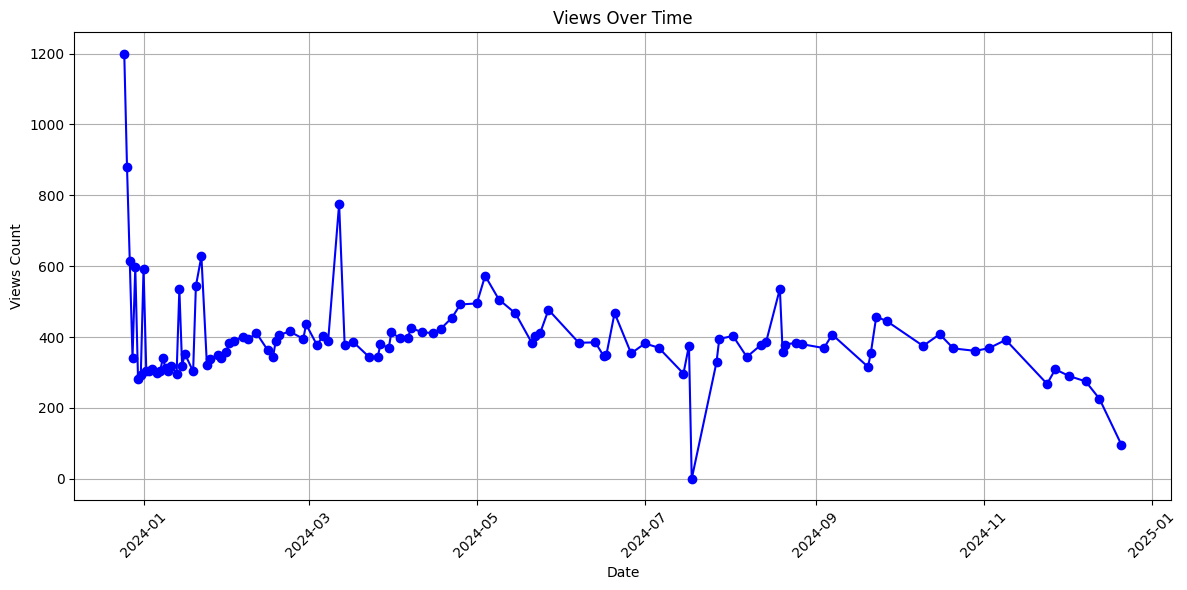

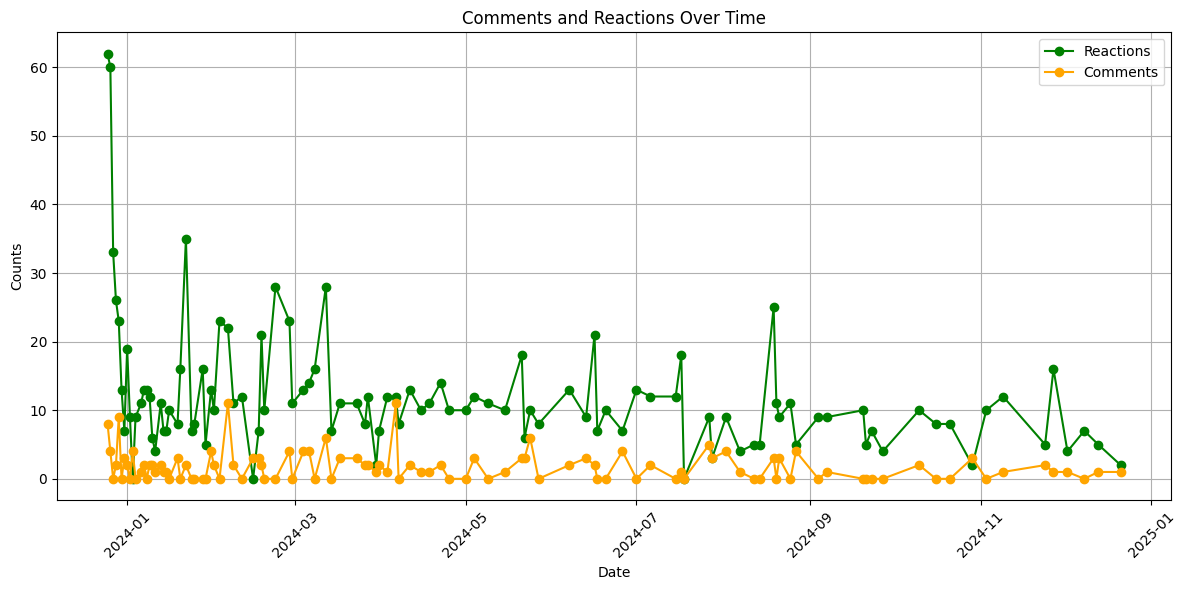

In [16]:
# Convert 'Date' to datetime format if not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Group by date and sum the numeric columns
performance = df1.groupby(df1['Date'].dt.date)[['Views', 'Reaction Count', 'Comments']].sum()


# Plot for "Views"
plt.figure(figsize=(12, 6))
plt.plot(performance.index, performance['Views'], label='Views', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Views Count')
plt.title('Views Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for "Comments" and "Reactions"
plt.figure(figsize=(12, 6))
plt.plot(performance.index, performance['Reaction Count'], label='Reactions', color='green', marker='o')
plt.plot(performance.index, performance['Comments'], label='Comments', color='orange', marker='o')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Comments and Reactions Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Number of Reactions & Comments are declining gradually while the number of Views is more or less stable.

### Engagement by Media Type

                  Views  Reaction Count  Comments
Media Type                                       
Video        381.266667        9.600000  1.177778
Photo        365.299528       10.681604  1.863208
No Media     312.538462       13.538462  1.384615
Other Media  304.500000        0.000000  2.000000


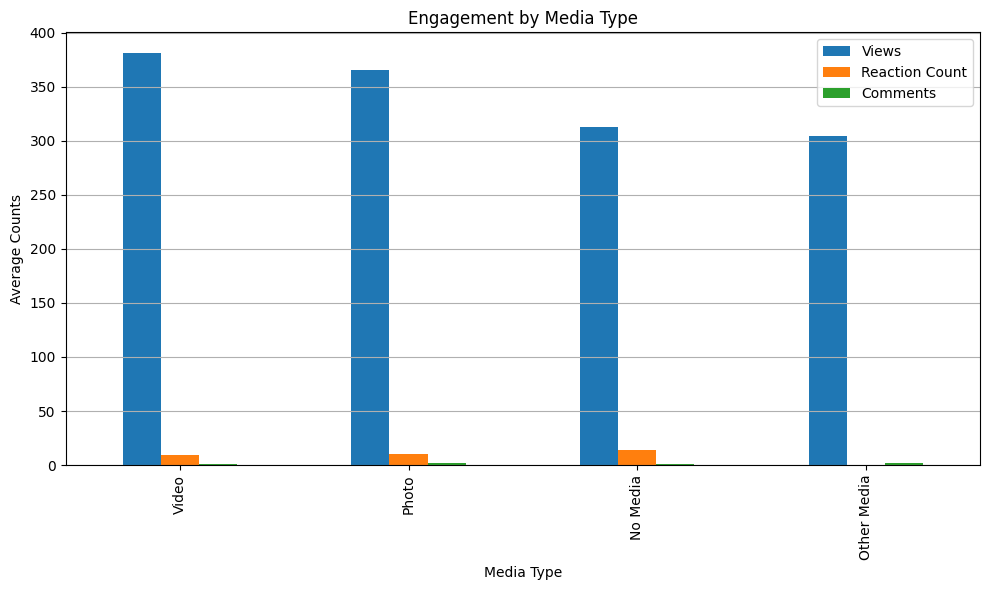

In [17]:
# Explode media types for posts with multiple media
df1['Media Type'] = df1['Media Type'].str.split(', ')
media_engagement = df1.explode('Media Type').groupby('Media Type').agg({
    'Views': 'mean',
    'Reaction Count': 'mean',
    'Comments': 'mean'
}).sort_values(by='Views', ascending=False)

print(media_engagement)

# Plot the results
media_engagement.plot(kind='bar', figsize=(10, 6), title="Engagement by Media Type")
plt.ylabel('Average Counts')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The data suggests that videos attract the most views, making them the best choice for maximizing reach. However, photos drive the highest reactions, indicating their strength in engaging emotions. Interestingly, text-only posts generate the most reactions per view, suggesting strong content value. Other media formats, despite low views and reactions, receive the highest comments, highlighting their potential for sparking discussions. 

### Correlation Analysis

In [18]:
import seaborn as sns

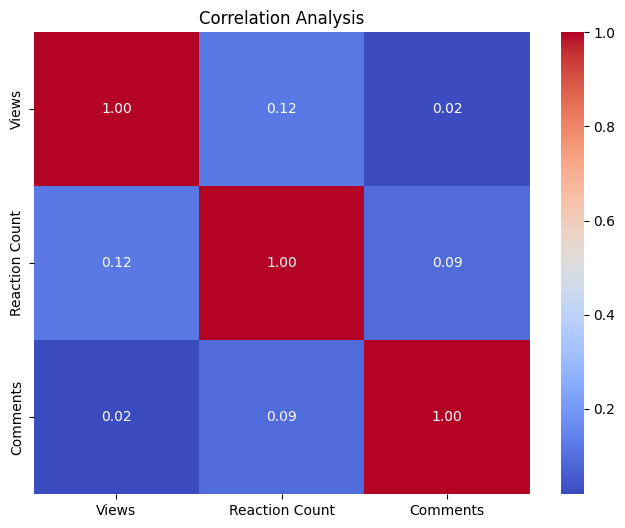

In [19]:
# Compute correlation matrix
correlation_matrix = df1[['Views', 'Reaction Count', 'Comments']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis')
plt.show()

Interestingly, the correlation between different engagement metrics is low.

## Time-based analysis

In [20]:
import torch
print(torch.__version__)

2.5.1+cpu


In [21]:
%pip install numpy transformers
from transformers import pipeline

Note: you may need to restart the kernel to use updated packages.


c:\Users\Aser\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
data=df1

In [23]:
# Convert 'Date' column to datetime for time-based analysis
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful time-based features
data['Hour'] = data['Date'].dt.hour
data['Day'] = data['Date'].dt.day_name()

In [24]:
# Calculate total reactions if available as a list (adjust this based on your data structure)
# Example: Sum reactions from different types
if 'Reactions' in data.columns:
    total_reactions = data['Reactions'].str.extractall(r"ReactionEmoji\(emoticon='.*?'\): (\d+)").astype(int).groupby(level=0).sum()
    data['Total_Reactions'] = total_reactions.reindex(data.index, fill_value=0).values


### Views vs. Day of the Week

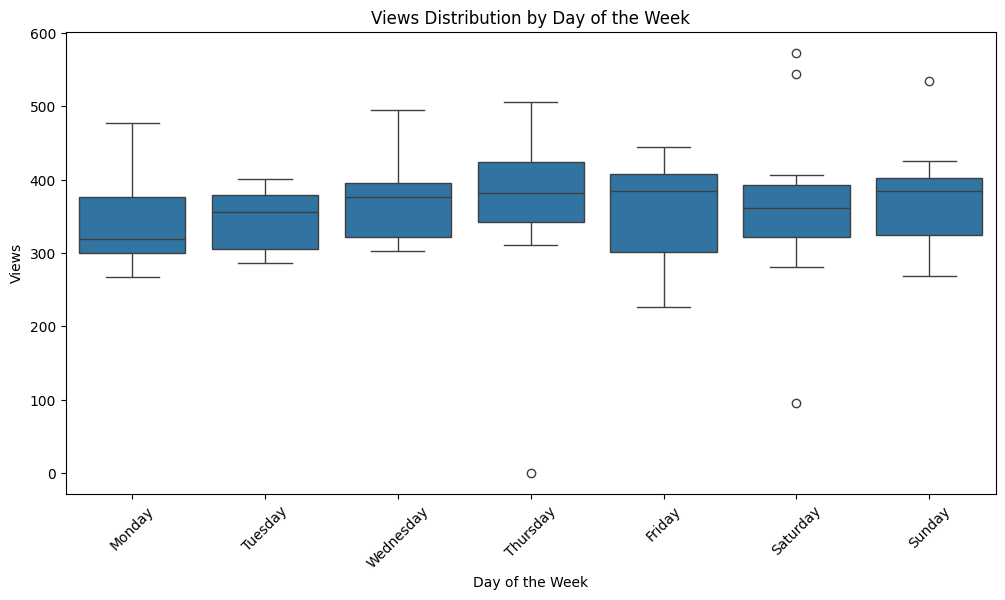

In [25]:
# Step 3: Visualization of engagement trends
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='Views', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Views Distribution by Day of the Week')
plt.ylabel('Views')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

### Engagement by hour

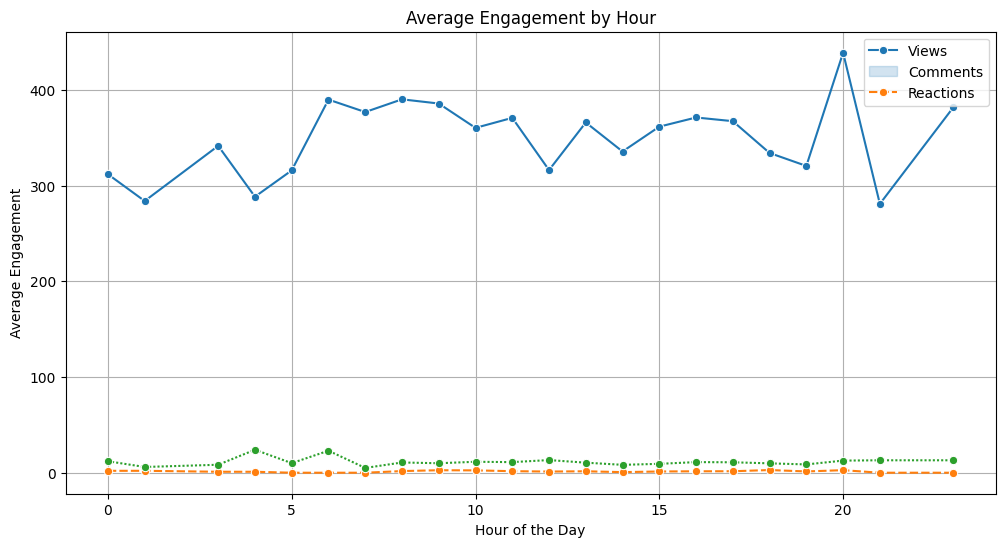

In [26]:
# Part 1: Engagement by Hour Posted
hourly_engagement = data.groupby('Hour')[['Views', 'Comments', 'Total_Reactions']].mean()

# Plot Engagement by Hour Posted
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_engagement, marker='o')
plt.title('Average Engagement by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.grid()
plt.legend(['Views', 'Comments', 'Reactions'])
plt.show()

The graph above could be not as insightful since I tend to post at around the same time so there're very few posts for a specific time of the day. I'll leave it here anyway, in case I'll update the input dataset a year later when the sample size grows (thus, wider distribution of the Time column).

## Exploring Media Attachments 

### Views vs. Media Attachments

In [27]:
# Ensure 'Media Type' is processed correctly
data['Media Count'] = data['Media Type'].fillna('No Media').astype(str).str.split(',').apply(len)

# Part 1: Views vs. Number of Media Attachments
views_by_media_count = data.groupby('Media Count')['Views'].mean()

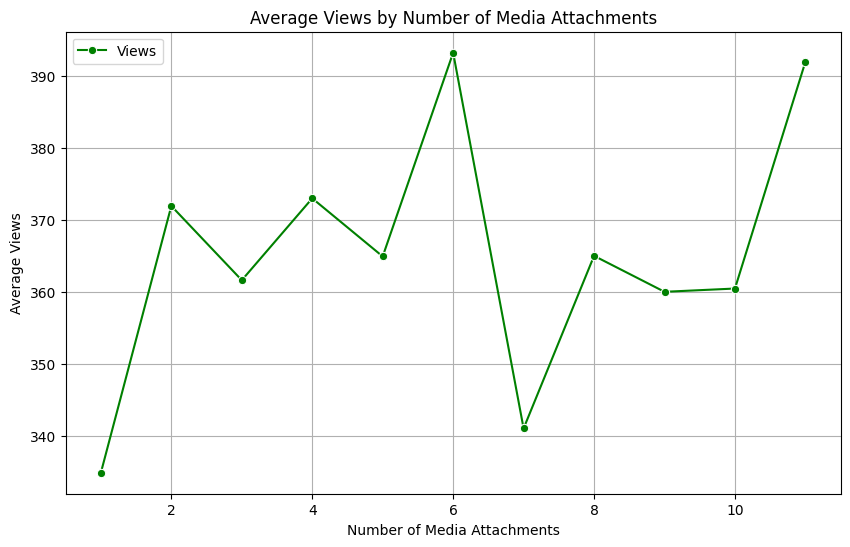

In [28]:
# Plot Views
plt.figure(figsize=(10, 6))
sns.lineplot(x=views_by_media_count.index, y=views_by_media_count.values, marker='o', label='Views', color='green')
plt.title('Average Views by Number of Media Attachments')
plt.xlabel('Number of Media Attachments')
plt.ylabel('Average Views')
plt.grid()
plt.legend()
plt.show()

### Comments and Reactions vs. Number of Media Attachments 

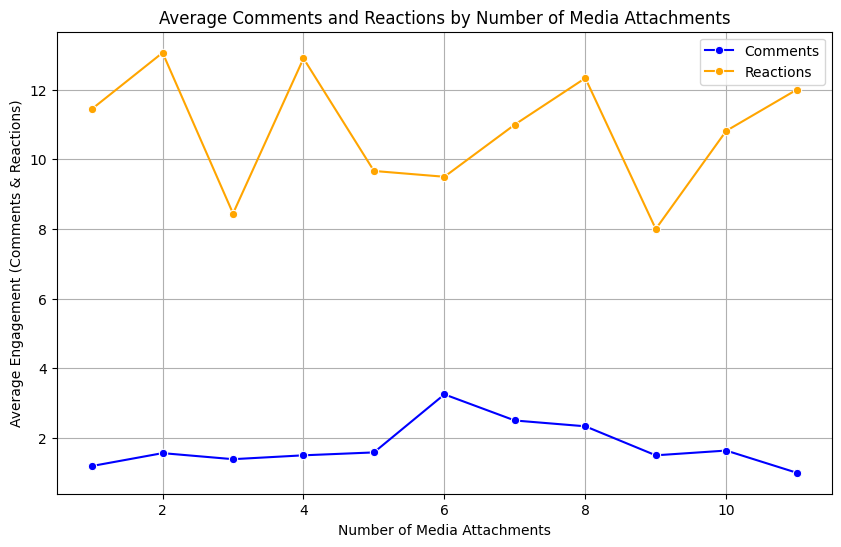

In [29]:
# Part 2: Comments and Reactions vs. Number of Media Attachments 
comments_by_media_count = data.groupby('Media Count')['Comments'].mean()
reactions_by_media_count = data.groupby('Media Count')['Total_Reactions'].mean()

# Plot Comments and Reactions
plt.figure(figsize=(10, 6))
sns.lineplot(x=comments_by_media_count.index, y=comments_by_media_count.values, marker='o', label='Comments', color='blue')
sns.lineplot(x=reactions_by_media_count.index, y=reactions_by_media_count.values, marker='o', label='Reactions', color='orange')
plt.title('Average Comments and Reactions by Number of Media Attachments')
plt.xlabel('Number of Media Attachments')
plt.ylabel('Average Engagement (Comments & Reactions)')
plt.grid()
plt.legend()
plt.show()

## Exploring Message Length

### Views vs. Message Length

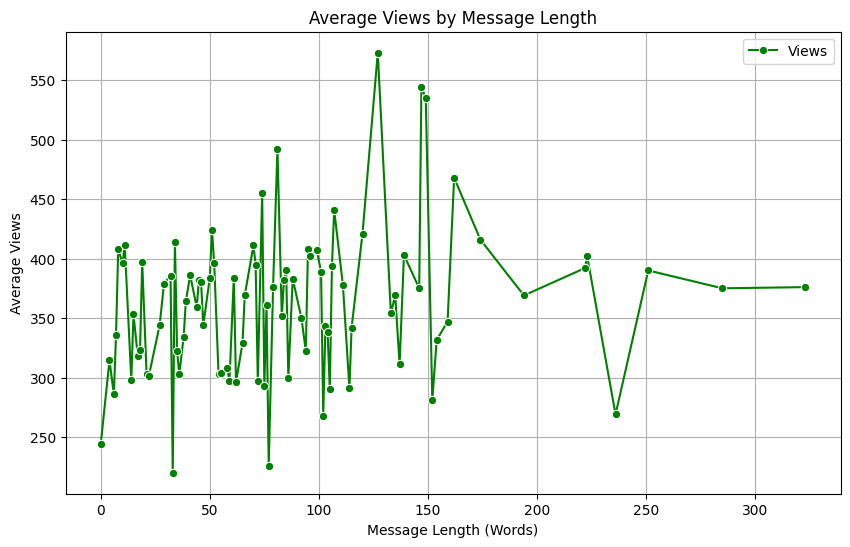

In [30]:
# Calculate message length (number of characters)
data['Message Length'] = data['Message'].fillna('').apply(lambda x: len(x.split()))

# Part 1: Views vs. Message Length
views_by_length = data.groupby('Message Length')['Views'].mean()

# Plot Views vs. Message Length
plt.figure(figsize=(10, 6))
sns.lineplot(x=views_by_length.index, y=views_by_length.values, marker='o', label='Views', color='green')
plt.title('Average Views by Message Length')
plt.xlabel('Message Length (Words)')
plt.ylabel('Average Views')
plt.grid()
plt.legend()
plt.show()

### Comments and Reactions vs. Message Length

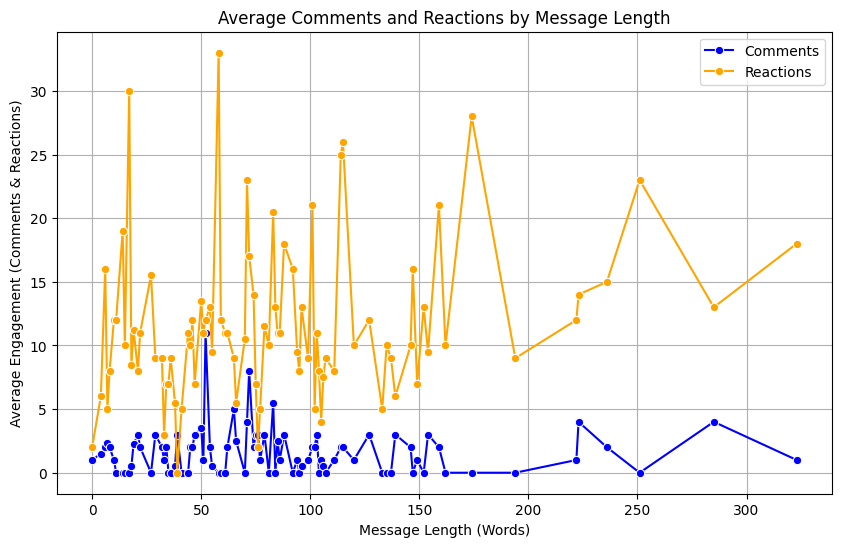

In [31]:
# Part 2: Comments and Reactions vs. Message Length
comments_by_length = data.groupby('Message Length')['Comments'].mean()
reactions_by_length = data.groupby('Message Length')['Total_Reactions'].mean()

# Plot Comments and Reactions vs. Message Length
plt.figure(figsize=(10, 6))
sns.lineplot(x=comments_by_length.index, y=comments_by_length.values, marker='o', label='Comments', color='blue')
sns.lineplot(x=reactions_by_length.index, y=reactions_by_length.values, marker='o', label='Reactions', color='orange')
plt.title('Average Comments and Reactions by Message Length')
plt.xlabel('Message Length (Words)')
plt.ylabel('Average Engagement (Comments & Reactions)')
plt.grid()
plt.legend()
plt.show()

There may not be a direct correlation between message length and the number of reactions/comments.

## Creating Tag Clouds

In [32]:
# Creating Tag Clouds
from wordcloud import WordCloud

In [33]:
import nltk
from nltk.corpus import stopwords
import re

In [34]:
# Ensure the Russian stopwords are available
nltk.download('stopwords')
# Combine English and Russian stopwords
stop_words = set(stopwords.words('english') + stopwords.words('russian'))

# Add custom stopwords
custom_stopwords = {'поэтому', 'это'}
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Preprocess the text: remove stopwords, punctuation, and special characters
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words] # Remove stopwords
    return ' '.join(words)

In [36]:
# Apply preprocessing to the Message column
data['Cleaned_Messages'] = data['Message'].apply(preprocess_text)

# Combine all messages into one string
all_text = ' '.join(data['Cleaned_Messages'])


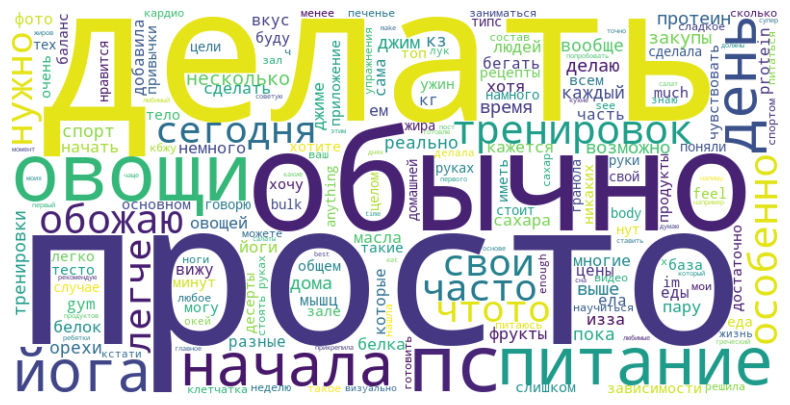

In [37]:
# Create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

OK, let's show only nouns

In [38]:
import pymorphy2
import spacy

In [39]:
# Load Russian language model
nlp = spacy.load("ru_core_news_sm")

# Extract nouns using spaCy
def extract_nouns_spacy(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ == "NOUN"]

In [40]:
# Apply to the Messages column
data['Nouns'] = data['Message'].apply(extract_nouns_spacy)

In [41]:
# Join the list of nouns into a single string before preprocessing
data['Cleaned_Messages_Nouns'] = data['Nouns'].apply(lambda x: preprocess_text(' '.join(x)))

# Combine all messages into one string
all_text2 = ' '.join(data['Cleaned_Messages_Nouns'])

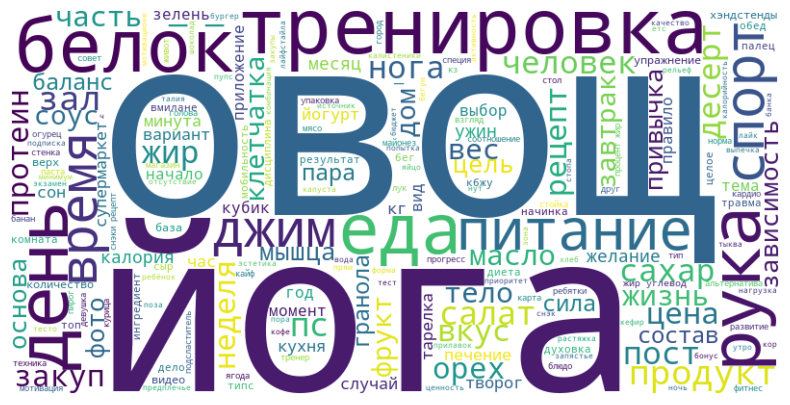

In [42]:
# Create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text2)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

## Clustering (categorizing) posts based on topics

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
#  Convert to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X = vectorizer.fit_transform(data['Cleaned_Messages'])

In [46]:
# 3. Elbow Method - Finding the optimal number of clusters
wcss = []
max_clusters = 10  # Define a maximum number of clusters to test
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

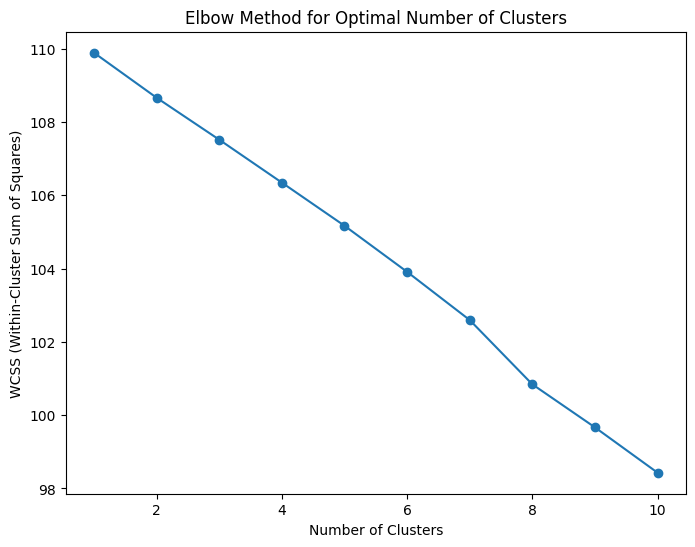

In [47]:
# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [48]:
kmeans_best = KMeans(n_clusters=10, random_state=42)
data['Cluster'] = kmeans_best.fit_predict(X)

In [49]:
# Calculate Silhouette Score
sil_score = silhouette_score(X, data['Cluster'])
print(f"Silhouette Score for {8} clusters: {sil_score}")

Silhouette Score for 8 clusters: -0.018739878408940557


A Silhouette Score close to 0 indicates that the clusters are not well-separated; some points may even be closer to points in other clusters than their own.
This suggests that the clustering algorithm may be struggling to identify meaningful distinctions in the data.

Since we're dealing with text data, clustering might not be the best approach if the text doesn't have distinct, easily separable topics. Instead, we can try topic modeling techniques, which are specifically designed to identify hidden topics in a collection of text.

Using BERTopic might be more appropriate since it doesn't require to specify the number of clusters and can uncover hidden thematic structures in the data.

## BERTopic

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [51]:
from umap import UMAP
from hdbscan import HDBSCAN

In [52]:
umap = UMAP(n_neighbors=10,
            n_components=5,
            min_dist=0.0,
            metric='cosine',
            low_memory=False,
            random_state=42) 

In [53]:
# Load a multilingual model
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

In [54]:
# Create a BERTopic model with the multilingual embedding
topic_model = BERTopic(embedding_model=embedding_model, language="multilingual",umap_model=umap) 

In [55]:
# Fit and transform the data
topics, probs = topic_model.fit_transform(data['Cleaned_Messages'])

In [56]:
# Add topics to the DataFrame
data['Topic'] = topics

In [57]:
# Display topic information
print(topic_model.get_topic_info())

   Topic  Count                             Name  \
0     -1     18        -1_закупы_цены_свои_овощи   
1      0     52         0_просто_обычно_пс_овощи   
2      1     49  1_делать_тренировок_йога_начала   

                                      Representation  \
0  [закупы, цены, свои, овощи, питаться, вмилане,...   
1  [просто, обычно, пс, овощи, протеин, protein, ...   
2  [делать, тренировок, йога, начала, спорт, рука...   

                                 Representative_Docs  
0  [завтра еду домой сдала свои экзамены lifes ch...  
1  [решила заодно делать разбор купленных продукт...  
2  [подход фитнесу который хотела иметь самого на...  


## Clustering based on nouns only

I feel like the model may yield better results if only nouns in the messages are used. Let's check that.

In [58]:
# Fit and transform the data
topics, probs = topic_model.fit_transform(data['Cleaned_Messages_Nouns'])

In [59]:
# Add topics to the DataFrame
data['Topic_Nouns'] = topics

In [60]:
# Display topic information
print(topic_model.get_topic_info())

   Topic  Count                          Name  \
0      0     53   0_овощ_белок_рецепт_питание   
1      1     43  1_йога_тренировка_спорт_рука   
2      2     23     2_вмилане_закуп_пост_день   

                                      Representation  \
0  [овощ, белок, рецепт, питание, салат, еда, дес...   
1  [йога, тренировка, спорт, рука, зал, джим, ног...   
2  [вмилане, закуп, пост, день, инсту, мид, путеш...   

                                 Representative_Docs  
0  [правило питание тарелка белок овощ овощ пара ...  
1  [хэндстенды часть рука сила баланс баланс коор...  
2  [минута зарядка день ноль желание метр карта д...  


In [61]:
topic_model.visualize_hierarchy()

The dendrogram's axis (distance) reflects dissimilarity, with smaller distances implying closer relationships. Makes sense, since "Food&Recipes" topic is more related to "Sport&Fitness" than the 3rd "Lifestyle" topic. I decided to rename them below, scanning through the keywords of each topic.

In [62]:
data = data.reset_index(drop=True)

In [63]:
# Rename topic_0 to "Food and Recipes"
data['Topic_Nouns'] = data['Topic_Nouns'].replace({0: "Food and Recipes"})
# Rename topic_1 to "Sport and Fitness"
data['Topic_Nouns'] = data['Topic_Nouns'].replace({1: "Sport and Fitness"})
# Rename topic_2 to "Lifestyle"
data['Topic_Nouns'] = data['Topic_Nouns'].replace({2: "Lifestyle"})

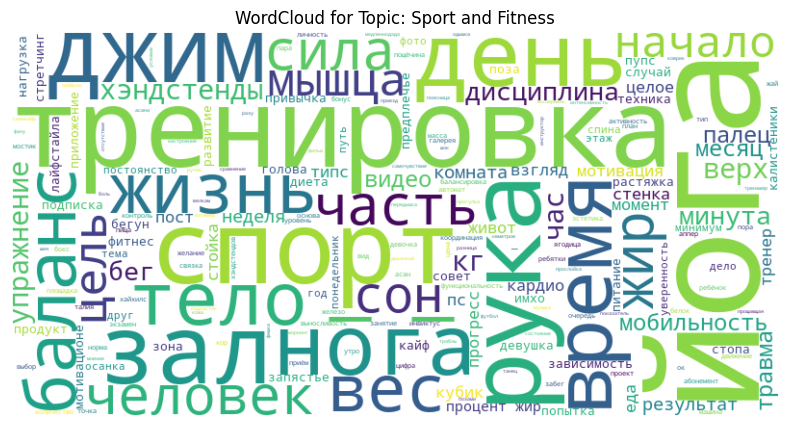

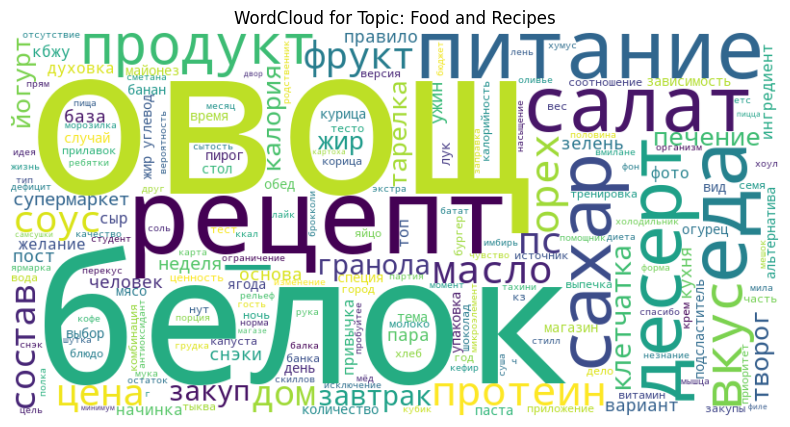

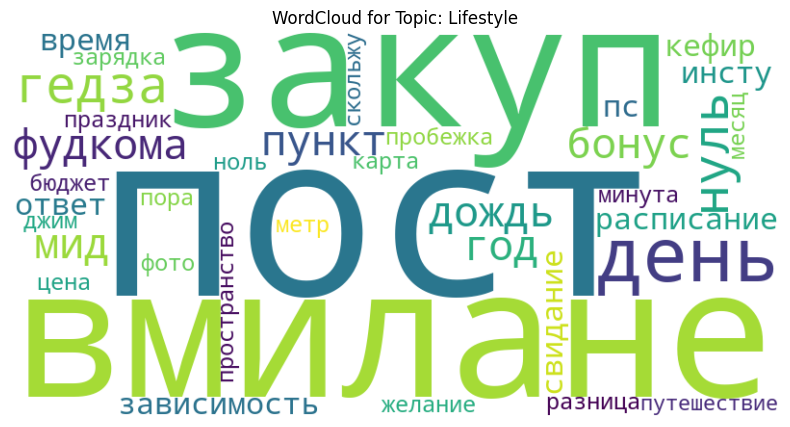

In [64]:
# WordCloud for each topic
for topic in data['Topic_Nouns'].unique():
    all_text = ' '.join(data.loc[data['Topic_Nouns'] == topic, 'Cleaned_Messages_Nouns'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axes for the word cloud
    plt.title(f"WordCloud for Topic: {topic}")
    plt.show()

## Engagements by Topic

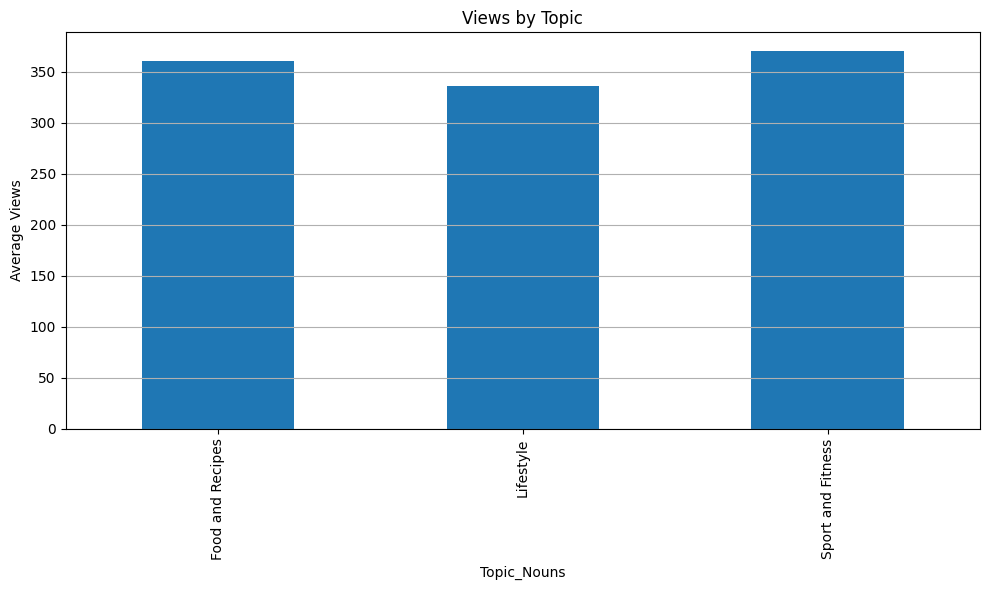

In [66]:
# Views by Topic
views_by_topic = data.groupby('Topic_Nouns')['Views'].mean()
# Plot the results
plt.figure(figsize=(12, 6))
views_by_topic.plot(kind='bar', figsize=(10, 6), title="Views by Topic")
plt.ylabel('Average Views')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

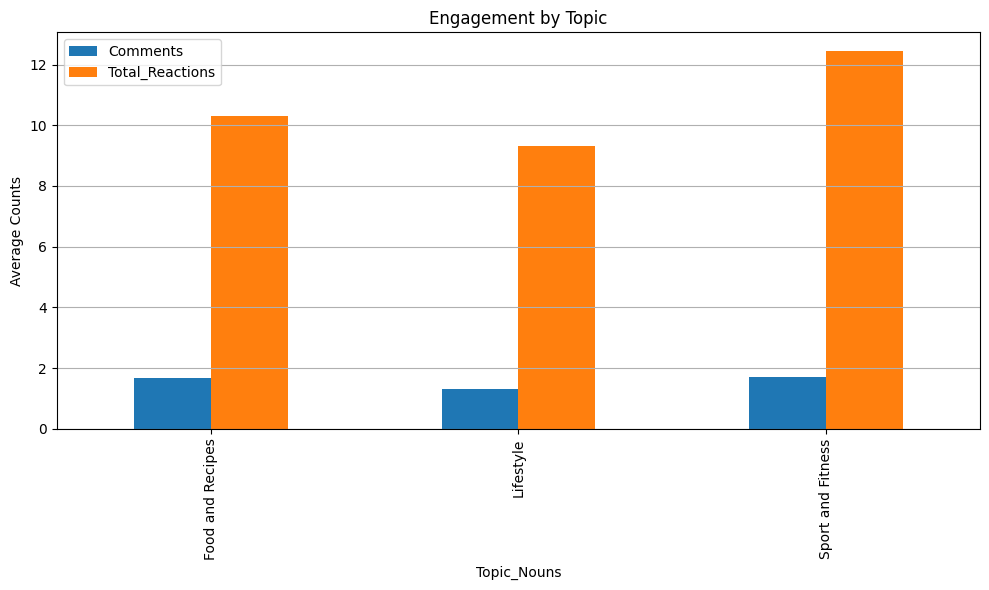

In [67]:
# Engagements by Topic
engagement_by_topic = data.groupby('Topic_Nouns')[['Comments', 'Total_Reactions']].mean()
# Plot the results
plt.figure(figsize=(12, 6))
engagement_by_topic.plot(kind='bar', figsize=(10, 6), title="Engagement by Topic")
plt.ylabel('Average Counts')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Sport and Fitness performs best overall for all metrics, suggesting it resonates well with the audience. It could also be because of the personal gym photos that are attached to such posts.